In [11]:
import pandas as pd
import numpy as np

# Load input features from CSV
data = pd.read_csv("diabetes.csv")

# Assuming the input features are columns in the CSV
X = data.drop(columns=['Outcome'])  # Adjust the target column name accordingly
print('Inputs Dataframe shape   :', X.shape)

# Calculate mean and standard deviation
X_mean = X.mean()
X_std = X.std()

# Standardization
Z = (X - X_mean) / X_std

# Calculate covariance matrix
c = Z.cov()

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(c)
print('Eigen values:\n', eigenvalues)
print('Eigen values Shape:', eigenvalues.shape)
print('Eigen Vector Shape:', eigenvectors.shape)

# Sort eigenvalues and eigenvectors
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Calculate explained variance
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)

# Determine number of components explaining 50% variance
n_components = np.argmax(explained_var >= 0.50) + 1
print(n_components)


Inputs Dataframe shape   : (768, 8)
Eigen values:
 [2.09437995 1.73121014 0.41981618 0.40446205 0.68262839 0.76234439
 0.87552904 1.02962987]
Eigen values Shape: (8,)
Eigen Vector Shape: (8, 8)
3


(768, 8)
(8, 8)
[0.26179749 0.47819876 0.60690249 0.71634362 0.81163667 0.89696522
 0.94944224 1.        ]
7
(537, 7)
Accuracy: 72.72727272727273


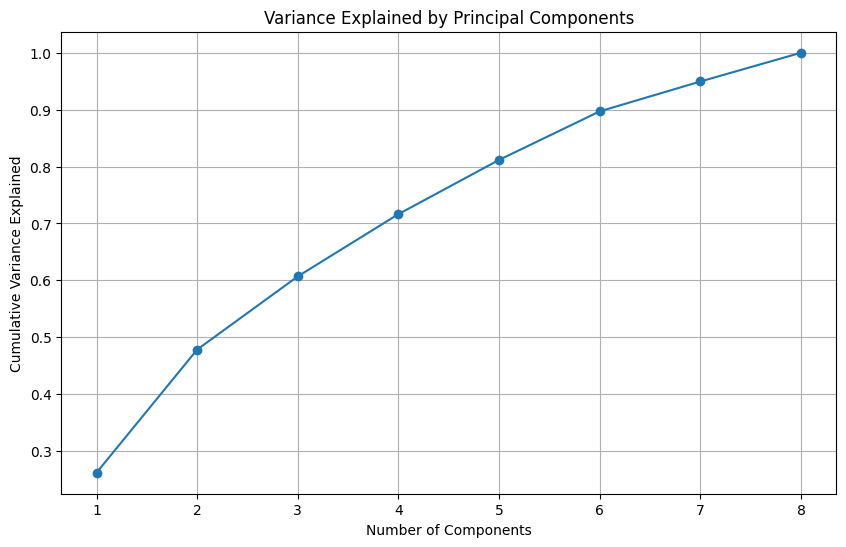

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load input features from CSV
data = pd.read_csv("diabetes.csv")

# Assuming the input features are columns in the CSV
X = data.drop(columns=['Outcome'])  # Adjust the target column name accordingly

# Calculate mean and standard deviation
X_mean = X.mean()
X_std= X.std()


# Standardization
Z = (X - X_mean) / X_std
print(Z.shape)
# Calculate covariance matrix
c = Z.cov()
print(c.shape)
# Eigen decomposition
eigenvalues, _ = np.linalg.eig(c)

# Sort eigenvalues in descending order
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]

# Calculate explained variance ratio
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
print(explained_var)
# Select the number of components where variance >= 0.50
n_components = np.argmax(explained_var >0.9)+1
print(n_components)

pca = PCA(n_components) 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)

model = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=3, min_samples_leaf=5)
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy * 100)

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(explained_var) + 1), explained_var, marker='o', linestyle='-')
plt.title('Variance Explained by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)


In [26]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
import matplotlib.pyplot as plt

# Load the dataset with the correct header
balance_data = pd.read_csv('diabetes.csv')

# Display the dataset information
print("Dataset Length: ", len(balance_data))
print("Dataset Shape: ", balance_data.shape)

# Assuming the first column is the target and the rest are features
X = balance_data.iloc[:, 0:7].values
Y = balance_data.iloc[:, 8].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=3, min_samples_leaf=5)

# Fit the model
model.fit(X_train, y_train)

# Predict the labels on the test set
y_pred = model.predict(X_test)

# Print predicted values and corresponding true values
"""print("Predicted values:")
for i in range(len(X_test)):
    print(X_test[i], "-", y_test[i])"""
print("Accuracy: ", accuracy_score(y_test, y_pred) * 100)


Dataset Length:  768
Dataset Shape:  (768, 9)
Accuracy:  70.56277056277057


In [32]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

# Load the dataset with the correct header
balance_data = pd.read_csv('diabetes.csv')

# Assuming the first column is the target and the rest are features
X = balance_data.iloc[:, 0:7].values
Y = balance_data.iloc[:, 8].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

# Apply PCA
pca = PCA(n_components=6)  
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=3, min_samples_leaf=5)

# Fit the model on PCA-transformed data
model.fit(X_train_pca, y_train)

# Predict the labels on the test set
y_pred = model.predict(X_test_pca)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy * 100)


Accuracy: 70.12987012987013
